# Setup

In [1]:
%load_ext autoreload
%autoreload 1

In [2]:
%aimport network
%aimport network_torch
%aimport torchnets
import numpy as np

DN = network.DeepNetwork
DNT = network_torch.DeepNetwork
FCN = torchnets.FullyConnectedNetwork

# Vectorization

In [2]:
a = np.array([1,2,3,4,5,6,7,8,9,10]) #rank 1 array which is neither a row vector (1,10) nor a column vector (10, 1)
b = np.array([1,2,3,4,5,6,7,8,9,10]).reshape((1,10))
c = np.array([1,2,3,4,5,6,7,8,9,10]).reshape((10, 1))
print(a.shape, b.shape, c.shape)
print(np.array_equal(a, b), np.array_equal(a, c))
print((a*b).shape, (a*c).shape, (b*c).shape)
print(np.dot(b,c).shape, np.dot(c,b).shape)

(10,) (1, 10) (10, 1)
False False
(1, 10) (10, 10) (10, 10)
(1, 1) (10, 10)


In [7]:
import time
a = np.random.rand(1000000)
b = np.random.rand(1000000)

tic = time.time()
c = np.dot(a,b)
toc = time.time()
print(c)
print("Vectorized version:" + str(1000*(toc-tic)) +"ms" )

c = 0
tic = time.time()
for i in range(1000000):
    c += a[i]*b[i]
toc = time.time()
print(c)
print("For loop:" + str(1000*(toc-tic)) + "ms")

249966.59497044512
Vectorized version:1.7580986022949219ms
249966.59497044657
For loop:556.1151504516602ms


In [14]:
print(np.zeros(10).shape)
print(np.zeros((10, 0)).shape)
print(np.zeros((0,10)).shape)

(10,)
(10, 0)
(0, 10)


# Vectorized version of Logistic Regression

There are three for loops:
* The outmost for loop is for the **i iterations**
    * second for loop is for the **m training examples**
        * third for loop is over the **nx weights**

We can vectorize second and third for loops this way:

In [83]:
nx, m = 10, 1000 
X = np.random.rand(nx*m).reshape((nx, m))
y = np.random.randint(low=0, high=2, size=m).reshape((1, m))

iterations = 100
alpha = 0.5
w = np.random.rand(nx).reshape((nx, 1))
b = np.random.rand(1).reshape(1,1)
for i in range(iterations):
    z = np.dot(w.T, X) + b #z.shape()= (1,m) 
    # np.dot(w.T, X) + b has broadcasting for b: (1,1) --> (1,m)
    a = 1/(1+np.exp((-1)*z)) #a.shape() = (1,m)
    J = -1/m*np.sum(y*np.log(a)+(1-y)*np.log(1-a), axis=1) #L.shape(1,m)
    print(J)
    dz = a - y #dz.shape(1,m)
    dw = 1/m * np.dot(X, dz.T) #dw.shape(nx, 1)
    db = 1/m * np.sum(dz)
    w = w - alpha * dw
    b = b - alpha * db
    

[1.41986636]
[1.10393502]
[0.88655215]
[0.76997461]
[0.72108426]
[0.7036203]
[0.69777363]
[0.69580776]
[0.69509335]
[0.69477913]
[0.69459369]
[0.69445083]
[0.6943232]
[0.6942021]
[0.69408473]
[0.69397018]
[0.69385811]
[0.6937484]
[0.69364097]
[0.69353576]
[0.69343272]
[0.6933318]
[0.69323296]
[0.69313616]
[0.69304135]
[0.6929485]
[0.69285755]
[0.69276848]
[0.69268124]
[0.69259579]
[0.69251209]
[0.69243012]
[0.69234982]
[0.69227117]
[0.69219414]
[0.69211868]
[0.69204477]
[0.69197237]
[0.69190145]
[0.69183199]
[0.69176394]
[0.69169728]
[0.69163198]
[0.69156802]
[0.69150535]
[0.69144397]
[0.69138383]
[0.69132492]
[0.69126721]
[0.69121066]
[0.69115527]
[0.691101]
[0.69104783]
[0.69099574]
[0.6909447]
[0.6908947]
[0.6908457]
[0.6907977]
[0.69075066]
[0.69070458]
[0.69065942]
[0.69061517]
[0.69057181]
[0.69052932]
[0.69048769]
[0.69044689]
[0.69040691]
[0.69036773]
[0.69032934]
[0.69029171]
[0.69025483]
[0.69021869]
[0.69018327]
[0.69014856]
[0.69011454]
[0.69008119]
[0.69004851]
[0.69001647

# Building a neural network with arbitrary activation function and hidden layers

In [8]:
def in_sphere(X, radius, center):
    return np.where(np.sum((X - center)**2, axis=0, keepdims=True) < radius, True, False)

def in_diagonal_sphere(X, radius, center):
    return in_sphere(X, radius/2, center-radius/2) + in_sphere(X, radius/2, center+radius/2)

def in_sphere_sequence(X, radius, center, seq=10):
    out = np.zeros((1, X.shape[1]), dtype=bool)
    r = radius / seq
    for i in range(seq):
        out += in_sphere(X, r, center-i*r) + in_sphere(X, r, center+i*r)
    return out
    

In [9]:
X = np.random.uniform(low=-2, high=2, size=(3,10000))
X_test = np.random.uniform(low=-2, high=2, size=(3,1000))

In [155]:
%%time
Y = in_sphere(X, 1.0, 0.0)
print(X[:,:6], '\n', Y[:, :6])
Y_test = in_sphere(X_test, 1.0, 0.0)

dn = DN([4,1], [DN.RELU, DN.SIGMOID])
dn.train(X, Y, alpha=0.5, max_iterations=10000)


Y_hat = dn.classify(X_test)
Y_hat = np.where(Y_hat>=0.5, True, False)

print('accuracy: ', np.sum(Y_hat == Y_test)/Y_hat.shape[1])

[[ 0.81387549 -0.3141217  -1.54608771 -0.62508154  0.5838078  -0.80966537]
 [ 1.42665321 -1.99369778  0.50020848  0.78288884  0.65039398  1.56100254]
 [ 0.36227043  0.0356978   0.20294804 -1.62306782 -0.00607913  0.69989529]] 
 [[False False False False  True False]]
7440 [0.03336406]
accuracy:  0.985
CPU times: user 6min 29s, sys: 20.7 s, total: 6min 50s
Wall time: 14.2 s


In [191]:
%%time
Y = in_diagonal_sphere(X, 1.0, 0.0)
print(X[:,:6], '\n', Y[:, :6])
Y_test = in_diagonal_sphere(X_test, 1.0, 0.0)

dn = DN([5,1], [DN.RELU,DN.SIGMOID])
dn.train(X, Y, alpha=0.5, max_iterations=10000)


Y_hat = dn.classify(X_test)
Y_hat = np.where(Y_hat>=0.5, True, False)

print('accuracy: ', np.sum(Y_hat == Y_test)/Y_hat.shape[1])

[[ 0.81387549 -0.3141217  -1.54608771 -0.62508154  0.5838078  -0.80966537]
 [ 1.42665321 -1.99369778  0.50020848  0.78288884  0.65039398  1.56100254]
 [ 0.36227043  0.0356978   0.20294804 -1.62306782 -0.00607913  0.69989529]] 
 [[False False False False  True False]]
5356 [0.05263828]
accuracy:  0.977
CPU times: user 5min 49s, sys: 19.2 s, total: 6min 8s
Wall time: 12.6 s


In [10]:
%%time
Y = in_sphere_sequence(X, 1.0, 0.0)
print(X[:,:6], '\n', Y[:, :6])
Y_test = in_sphere_sequence(X_test, 1.0, 0.0)

dn = DN([5,1], [DN.SIGMOID,DN.SIGMOID])
dn.train(X, Y, alpha=0.5, max_iterations=10000)


Y_hat = dn.classify(X_test)
Y_hat = np.where(Y_hat>=0.5, True, False)

print('accuracy: ', np.sum(Y_hat == Y_test)/Y_hat.shape[1])

[[-0.62379128 -1.59088895 -1.2668483  -0.48814007 -0.41834499 -1.30764606]
 [-0.87151739  1.49108778  0.22281211 -0.89757436 -0.66785392  1.803055  ]
 [-1.64534396  0.08717931 -0.76229082  0.13478964  1.9125314   0.23986735]] 
 [[False False False False False False]]


AssertionError: invalid dropout list

In [40]:
np.random.rand((3,2))

[autoreload of network failed: Traceback (most recent call last):
  File "/nfs/stak/users/khodadaa/miniconda3/envs/db/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/nfs/stak/users/khodadaa/miniconda3/envs/db/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 368, in superreload
    module = reload(module)
  File "/nfs/stak/users/khodadaa/miniconda3/envs/db/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/nfs/stak/users/khodadaa/miniconda3/envs/db/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 674, in exec_module
  File "<frozen importlib._bootstrap_external>", line 781, in get_code
  File "<frozen importlib._bootstrap_external>", line 741, in source_to_code
  File "<frozen importlib._boo

TypeError: 'tuple' object cannot be interpreted as an integer

# Circuit theory and Deep learning
Example of a function that needs exponential(2^(n-1)) units if not represented in deep layers.

In [3]:
def XOR(X):
    from functools import reduce
    xor_func = lambda vec: reduce((lambda x,y: bool(x)!= bool(y)), vec)
    return np.apply_along_axis(xor_func, axis=0, arr=X).reshape(1, X.shape[1])

In [4]:
X = np.random.randint(low=0, high=2, size=(5,1000))
X_test = np.random.randint(low=0, high=2, size=(5,100))

In [6]:
%%time
Y = XOR(X)
print(X[:,:2], '\n', Y[:,:2])
Y_test = XOR(X_test)

dn = DN([311, 1], [DN.RELU, DN.SIGMOID])
"""Train, Test = (1.0, 1.0)
DN([400,1], [DN.RELU, DN.SIGMOID])
DN([60,50, 1], [DN.RELU, DN.RELU, DN.SIGMOID])
DN([63,37, 1], [DN.RELU, DN.RELU, DN.SIGMOID])
DN([80,40,20,10,1], [DN.RELU, DN.RELU, DN.RELU, DN.RELU, DN.SIGMOID])
"""
dn.train(X, Y, alpha=0.01, max_iterations=10000, print_cost_every=500)

Y_hat = dn.classify(X)
Y_hat = np.where(Y_hat>=0.5, True, False)

print('Train accuracy: ', np.sum(Y_hat == Y)/Y_hat.shape[1])

Y_hat = dn.classify(X_test)
Y_hat = np.where(Y_hat>=0.5, True, False)

print('Test accuracy: ', np.sum(Y_hat == Y_test)/Y_hat.shape[1])

[[0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]] 
 [[ True  True]]
iteration: 0, cost: [0.73139991]
iteration: 500, cost: [0.66955723]
iteration: 1000, cost: [0.65104971]
iteration: 1500, cost: [0.63129436]
iteration: 2000, cost: [0.60839577]
iteration: 2500, cost: [0.58205764]
iteration: 3000, cost: [0.55199586]
iteration: 3500, cost: [0.51873364]
iteration: 4000, cost: [0.48296]
iteration: 4500, cost: [0.44569435]
iteration: 5000, cost: [0.40858241]
iteration: 5500, cost: [0.37300618]
iteration: 6000, cost: [0.33903508]
iteration: 6500, cost: [0.30759945]
iteration: 7000, cost: [0.27946559]
iteration: 7500, cost: [0.25425153]
iteration: 8000, cost: [0.23170359]
iteration: 8500, cost: [0.21133404]
iteration: 9000, cost: [0.19309526]
iteration: 9500, cost: [0.17673523]
iteration: 9748, cost: [0.16927594]
Train accuracy:  0.983
Test accuracy:  0.95
CPU times: user 38min 17s, sys: 2min 20s, total: 40min 38s
Wall time: 1min 24s


# Coursera
https://www.coursera.org/learn/neural-networks-deep-learning?specialization=deep-learning

## Cat vs. nonCat Example

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


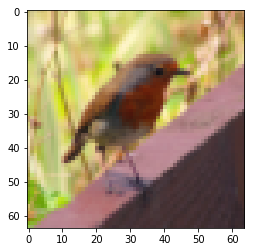

y = 0. It's a non-cat picture.


In [24]:
import h5py
import matplotlib.pyplot as plt
def load_data():
    train_dataset = h5py.File('data/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('data/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes


train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

# Example of a picture
index = 10
plt.imshow(train_x_orig[index])
plt.show()
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

$12,288$ equals $64 \times 64 \times 3$ which is the size of one reshaped image vector.

In [36]:
%%time

dn = DN([20, 7, 5, 1], [DN.RELU, DN.RELU, DN.RELU, DN.SIGMOID])
dn.train(train_x, train_y, alpha=0.0075, max_iterations=2400)
# dn.train(train_x, train_y, alpha=0.0075, max_iterations=2400, lambd=1.0)
# dn.train(train_x, train_y, alpha=0.0075, max_iterations=2400, dropout=[False, 0.01, False, False, False])


Y_hat = dn.classify(test_x)
Y_hat = np.where(Y_hat>=0.5, True, False)

print('Test accuracy: ', np.sum(Y_hat == test_y)/Y_hat.shape[1])

iteration: 0, cost: [0.77174933]
iteration: 100, cost: [0.67299362]
iteration: 200, cost: [0.64715121]
iteration: 300, cost: [0.60869193]
iteration: 400, cost: [0.57999815]
iteration: 500, cost: [0.58233823]
iteration: 600, cost: [0.4567194]
iteration: 700, cost: [0.46068667]
iteration: 800, cost: [0.41227748]
iteration: 900, cost: [0.30480673]
iteration: 1000, cost: [0.32689108]
iteration: 1100, cost: [0.25017321]
iteration: 1200, cost: [0.21314738]
iteration: 1300, cost: [0.17070875]
iteration: 1400, cost: [0.15352608]
iteration: 1500, cost: [0.13415954]
iteration: 1600, cost: [0.12348212]
iteration: 1700, cost: [0.10960806]
iteration: 1800, cost: [0.10093713]
iteration: 1900, cost: [0.09757583]
iteration: 2000, cost: [0.08565674]
iteration: 2100, cost: [0.08035706]
iteration: 2200, cost: [0.07453497]
iteration: 2300, cost: [0.06942943]
iteration: 2399, cost: [0.0655564]
Test accuracy:  0.8
CPU times: user 5min 3s, sys: 23 s, total: 5min 26s
Wall time: 11.3 s


In [89]:
Y_hat = dn.classify(train_x)
Y_hat = np.where(Y_hat>=0.5, True, False)

print('Train accuracy: ', np.sum(Y_hat == train_y)/Y_hat.shape[1])

Train accuracy:  1.0


## Dropout and regularization

In [3]:
import numpy as np
import sklearn
import sklearn.datasets
import matplotlib.pyplot as plt
import scipy.io
%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

def load_2D_dataset():
    data = scipy.io.loadmat('../data/data.mat')
    train_X = data['X'].T
    train_Y = data['y'].T
    test_X = data['Xval'].T
    test_Y = data['yval'].T

#     plt.scatter(train_X[0, :], train_X[1, :], c=train_Y, s=40, cmap=plt.cm.Spectral);
    
    return train_X, train_Y, test_X, test_Y

train_X, train_Y, test_X, test_Y = load_2D_dataset()

In [6]:
%%time
dn = DN([20, 3, 1], [DN.RELU, DN.RELU, DN.SIGMOID]) # numpy
# dn = DNT([20, 3, 1], [DNT.RELU, DNT.RELU, DNT.SIGMOID]) # pytorch

dn.train(train_X, train_Y, alpha=0.1, max_iterations=3000, print_cost_every=1000, terminate_on_cost_change=1e-50)
# dn.train(train_X, train_Y, alpha=0.3, max_iterations=2000, dropout=[False, 0.1, 0.01, False])

Y_hat = dn.classify(test_X)
Y_hat = np.where(Y_hat>=0.5, True, False)

print('Test accuracy: ', np.sum(Y_hat == test_Y)/Y_hat.shape[1])

iteration: 0, cost: [0.72977688]
iteration: 1000, cost: [0.23089703]
iteration: 2000, cost: [0.22581166]
iteration: 2999, cost: [0.2189547]
Test accuracy:  0.925
CPU times: user 1.11 s, sys: 12.8 ms, total: 1.13 s
Wall time: 1.14 s


In [5]:
Y_hat = dn.classify(train_X)
Y_hat = np.where(Y_hat>=0.5, True, False)

print('Train accuracy: ', np.sum(Y_hat == train_Y)/Y_hat.shape[1])

Train accuracy:  0.9289099526066351


# Udacity

## Fashion-MNIST 
https://github.com/udacity/deep-learning-v2-pytorch/tree/master/intro-to-pytorch

In [95]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

print(trainset.train_data.shape, testset.test_data.shape)
images, labels = next(iter(trainloader))
print(images.shape, labels.shape)

torch.Size([60000, 28, 28]) torch.Size([10000, 28, 28])
torch.Size([64, 1, 28, 28]) torch.Size([64])


In general, a “2d” tensor in CNNs is of size “Batch x Channels x Height x Width.” For the actual input to the network, channels is usually 3 for RGB or 1 if it’s greyscale. For the outputs of layers in the network, “output channels” is analagous to the number of neurons, or the number of hidden units, of a layer. So, the latter–output channels are the number of filters in one layer, while input channels are the number of filters in the incoming layer.

In [155]:
%%time
# My Code
from collections import OrderedDict
from torch import nn, optim
from torch.autograd import Variable
model = nn.Sequential(OrderedDict([('fc1', nn.Linear(28*28, 256)), ('relu1', nn.ReLU()), 
                                   ('fc2', nn.Linear(256, 128)), ('relu2', nn.ReLU()),
                                   ('fc3', nn.Linear(128, 64)), ('relu3', nn.ReLU()),
                                   ('fc4', nn.Linear(64, 10)), ('logsofmx', nn.LogSoftmax(dim=1))]))

print('Model:\n', model)
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epoch = 4
for e in range(epoch):
    running_loss = 0    
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        images, labels = Variable(images), Variable(labels)
        
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.data[0]
    else:
        print(f'Training loss: {running_loss/len(trainloader)}')

Model:
 Sequential(
  (fc1): Linear(in_features=784, out_features=256)
  (relu1): ReLU()
  (fc2): Linear(in_features=256, out_features=128)
  (relu2): ReLU()
  (fc3): Linear(in_features=128, out_features=64)
  (relu3): ReLU()
  (fc4): Linear(in_features=64, out_features=10)
  (logsofmx): LogSoftmax()
)
Training loss: 0.5136411200041202
Training loss: 0.39053860133581325
Training loss: 0.3559039857373563
Training loss: 0.33352756355680635
CPU times: user 43min 3s, sys: 1h 47min 24s, total: 2h 30min 27s
Wall time: 16min 5s


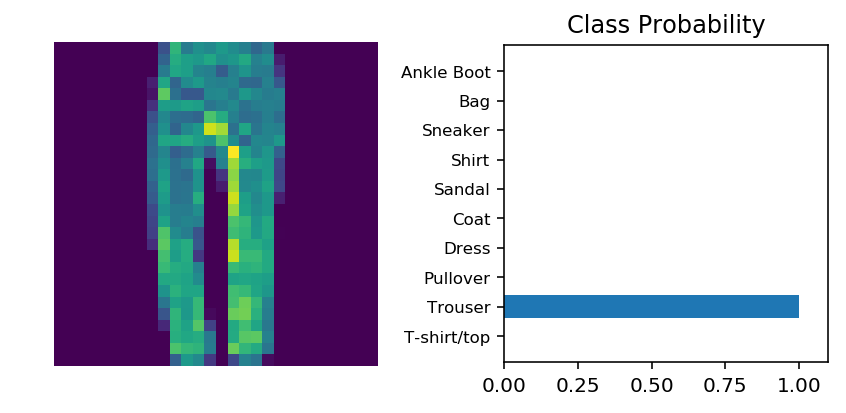

In [167]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = next(dataiter)
img = images[62]
im = img.view(img.shape[0], -1)
# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(model(Variable(im)))

# Plot the image and probabilities
helper.view_classify(img, ps, version='Fashion')

In [146]:
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)
images, labels = Variable(images), Variable(labels)

log_ps = model(images)
loss = criterion(log_ps, labels)

In [3]:
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)

net = FCN(28*28, [256, 128, 64, 10], [FCN.RELU, FCN.RELU, FCN.RELU, FCN.LOGSOFTMAX], 
    loss_function=FCN.NLLLOSS, optimizer_class=FCN.ADAM)
print(net)

FullyConnectedNetwork(
  (fc1): Linear(in_features=784, out_features=256)
  (ac1): ReLU()
  (fc2): Linear(in_features=256, out_features=128)
  (ac2): ReLU()
  (fc3): Linear(in_features=128, out_features=64)
  (ac3): ReLU()
  (fc4): Linear(in_features=64, out_features=10)
  (ac4): LogSoftmax()
  (criterion): NLLLoss(
  )
)


In [4]:
net.train(trainset, lr=0.003, epochs=1)

Epoch 0. Training loss: Variable containing:
 0.5158
[torch.FloatTensor of size 1]



## My

In [3]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)

In [17]:
net = FCN(FCN.nl_loss, FCN.Adam, input_size=28*28, layer_sizes=[256, 128, 64, 10], 
          activation_functions=[FCN.relu, FCN.relu, FCN.relu, FCN.log_soft_max])
net

FullyConnectedNetwork(
Optimizer:Adam
Criterion:NLLLos
Layers:
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (ac1): ReLU()
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (ac2): ReLU()
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (ac3): ReLU()
  (fc4): Linear(in_features=64, out_features=10, bias=True)
  (ac4): LogSoftmax()
)

In [78]:
net.train(trainset, testset, lr=0.003, epochs=1)

Epoch 0. Training loss: 0.288, Test loss: 0.416, Test Accuracy: 86.78%


# Scratchpad

In [12]:
import torch
from torch.autograd import Variable
x = Variable(torch.randn(1,4), requires_grad=True)
print(x)
y = x**2
z = y.mean()
print(x.grad)
z.backward()
print(x.grad)
print(x/2)

Variable containing:
-0.3437 -0.2059 -0.0318  1.4417
[torch.FloatTensor of size 1x4]

None
Variable containing:
-0.1718 -0.1030 -0.0159  0.7209
[torch.FloatTensor of size 1x4]

Variable containing:
-0.1718 -0.1030 -0.0159  0.7209
[torch.FloatTensor of size 1x4]



In [57]:
import torch
t1 = torch.Tensor([1, 2, 3, 4])
t2 = torch.Tensor([[1], [2], [3], [4]])
print(t1.shape, t2.shape, (t1==t2).shape)

torch.Size([4]) torch.Size([4, 1]) torch.Size([4, 4])


In [61]:
import numpy as np
a0 = np.array([1, 2, 3, 4])
a1 = np.array([[1, 2, 3, 4]])
a2 = np.array([[1], [2], [3], [4]])
print(a0.shape, a1.shape, a2.shape, (a0==a1).shape, (a1==a2).shape)

(4,) (1, 4) (4, 1) (1, 4) (4, 4)
